In [29]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = open("../parsed/", "r")

In [3]:
content = f.read()

In [5]:
a = np.load("../parsed/indices.npy")

In [23]:
unique, inverse_idx, counts = np.unique(a, return_inverse=True, return_counts=True)

In [24]:
index = unique[np.argsort(counts)[::-1]]

In [42]:
counts[index][1000:30000].sum() / counts.sum()

0.24110359408557683

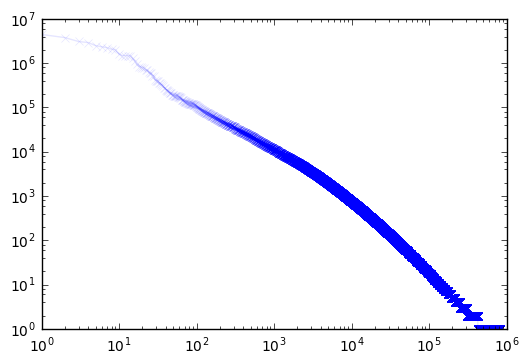

In [34]:
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.plot(counts[index], marker="x", alpha=0.1)

In [46]:
contexts = a[:20*int(len(a)/20)].reshape(-1, 20)

In [49]:
contexts[3]

array([ 3, 45, 46, 47, 48, 49, 50, 15, 51,  0, 24, 52, 53, 15, 54, 55, 56,
       57, 58, 59])

In [58]:
def lookup_word(idx):
    result = None
    fp = open("../parsed/vocabulary")
    for i, line in enumerate(fp):
        if i == idx:
            result = line[:-1]
            break
    fp.close()
    return result

In [65]:
def lookup_index(w):
    result = None
    fp = open("../parsed/vocabulary")
    for i, line in enumerate(fp):
        if line[:-1] == w:
            result = i
            break
    fp.close()
    return result

In [206]:
left_cutoff_index = 10000
right_cut_freq_limit = 150
num_oov_words = 100

right_cutoff_index = (counts >= right_cut_freq_limit).sum()-1

In [207]:
oov_words = np.random.choice(index[left_cutoff_index:right_cutoff_index], replace=False, size=num_oov_words)

In [208]:
def show_context(cidx):
    result = []
    for idx in contexts[cidx]:
        result.append(lookup_word(idx))
    return result

In [209]:
def get_contexts(w):
    return np.where( (contexts == w).sum(axis=1) > 0 )[0]

In [210]:
oov_contexts = []
for i in range(0,num_oov_words):
    print("\r%d/%d" % (i, num_oov_words), end="")
    oov_contexts += [ c for c in get_contexts(oov_words[i]) ]
oov_contexts = np.array(oov_contexts)

99/100

In [211]:
np.unique(oov_contexts).shape[0] / contexts.shape[0]

0.005091639044384064

In [222]:
show_context(oov_contexts[424])

['manuel',
 'm',
 'ponce',
 'is',
 'recognized',
 'as',
 'an',
 'important',
 'composer',
 'for',
 'the',
 'spanish',
 'classical',
 'guitar',
 'responsible',
 'for',
 'widening',
 'the',
 'repertorium',
 'for']

In [256]:
for cidx in get_contexts(lookup_index("kernel")):
    print(" ".join(show_context(cidx)))

software open source software kernel and core operating system called darwin apple also uses an open source framework called webkit
of its design lifecycle newton had a large format screen more internal memory and a rich object oriented graphics kernel
the plum and cherry this being replaced by a leathery coat called a hull which contains the edible kernel commonly
one often with white flowers producing sweet almonds and the other often with pink flowers producing bitter almonds the kernel
obtained from the dried kernel of the plant this oil has been traditionally used by massage therapists to lubricate the
remains unchanged for every group g there is a natural group homomorphism g aut g whose kernel is the center
linux kernel often construct abstractions where different assembly language is used on each platform the program supports but it is
a programmer heavily involved in the development of the linux kernel since its early days one nine nine one whilst
of the networking subsystem h

KeyboardInterrupt: 